In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch ## to plot dendrogram
from sklearn.cluster import AgglomerativeClustering ##clustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("crime_data.csv")
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
data = data.rename({'Unnamed: 0':'States'}, axis=1)
data.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   States    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [6]:
data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [7]:
data.isna().sum()

States      0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

# Hierarchical Clustering

In [8]:
#normalization
def norm_funct(i):
    x = (i-i.min())/(i.max() - i.min())
    print(x)
    return x

In [9]:
data.iloc[:, 1:]

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [10]:
df_norm = norm_funct(data.iloc[:, 1:])

      Murder   Assault  UrbanPop      Rape
0   0.746988  0.654110  0.440678  0.359173
1   0.554217  0.746575  0.271186  0.961240
2   0.439759  0.852740  0.813559  0.612403
3   0.481928  0.496575  0.305085  0.315245
4   0.493976  0.791096  1.000000  0.860465
5   0.427711  0.544521  0.779661  0.811370
6   0.150602  0.222603  0.762712  0.098191
7   0.307229  0.660959  0.677966  0.219638
8   0.879518  0.993151  0.813559  0.635659
9   1.000000  0.568493  0.474576  0.478036
10  0.271084  0.003425  0.864407  0.333333
11  0.108434  0.256849  0.372881  0.178295
12  0.578313  0.698630  0.864407  0.431525
13  0.385542  0.232877  0.559322  0.354005
14  0.084337  0.037671  0.423729  0.103359
15  0.313253  0.239726  0.576271  0.276486
16  0.536145  0.219178  0.338983  0.232558
17  0.879518  0.698630  0.576271  0.385013
18  0.078313  0.130137  0.322034  0.012920
19  0.632530  0.873288  0.593220  0.529716
20  0.216867  0.356164  0.898305  0.232558
21  0.680723  0.719178  0.711864  0.718346
22  0.11445

In [11]:
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


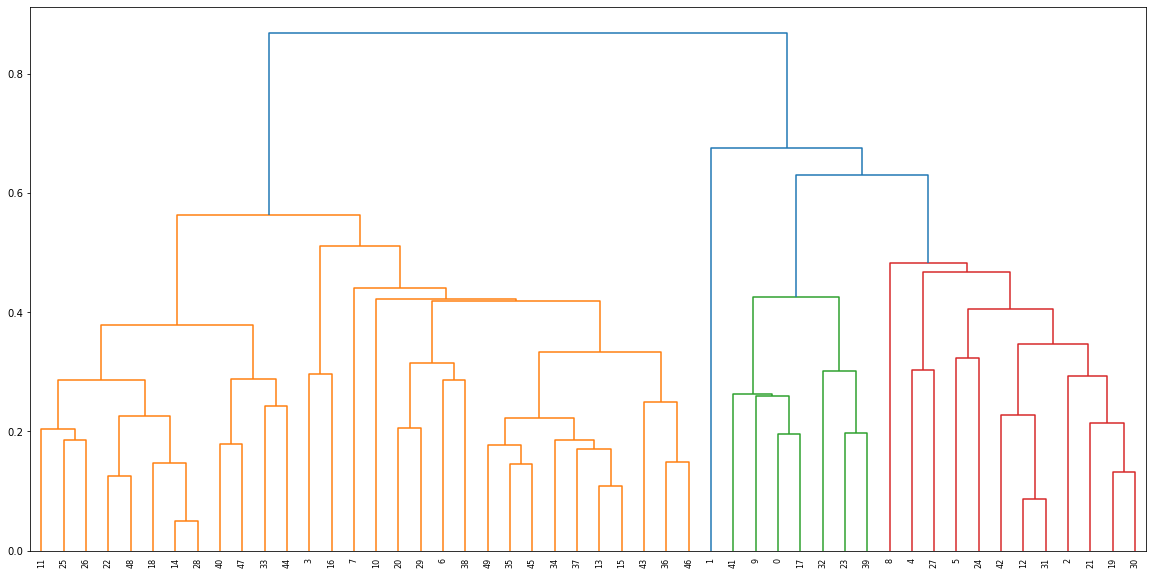

In [12]:
#create dendrogram
fig_size = plt.figure(figsize = (20, 10))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='average'))

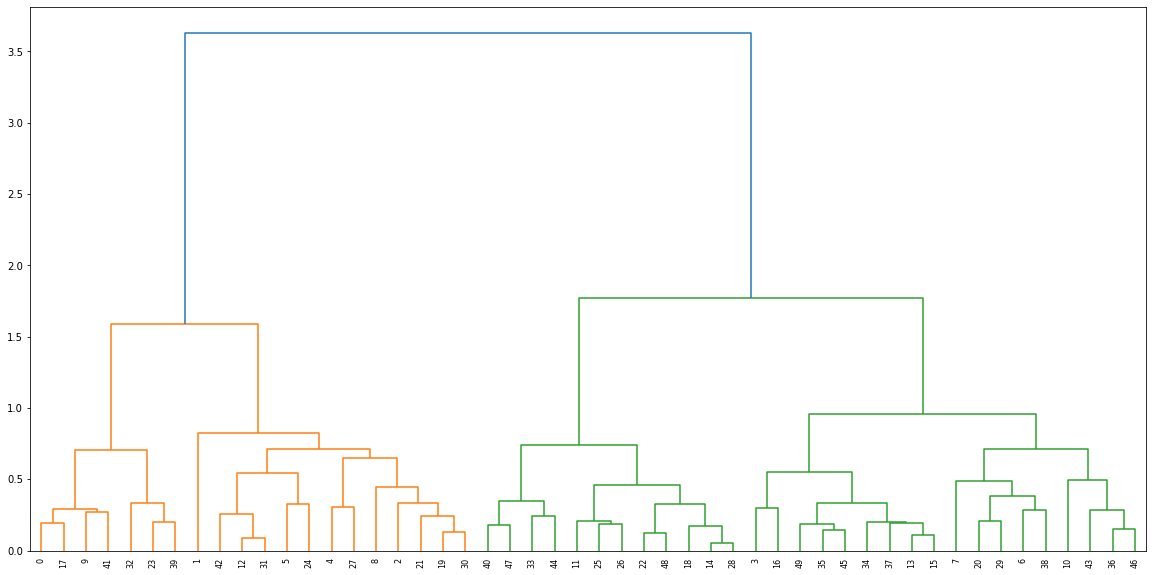

In [13]:
fig_size = plt.figure(figsize = (20, 10))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='ward'))

In [14]:
#create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'average', distance_threshold=None)
hc.fit(df_norm)
y_hc = hc.fit_predict(df_norm)

In [15]:
set(y_hc)

{0, 1, 2, 3}

In [16]:
y_hc1 = pd.DataFrame(y_hc, columns=['Clusters'])
y_hc1

,Clusters
0,3
1,2
2,1
3,0
4,1
5,1
6,0
7,0
8,1
9,3


In [17]:
y_hc1['Clusters'].value_counts()

0    30
1    12
3     7
2     1
Name: Clusters, dtype: int64

# K-Means Clustering

In [18]:
scaler = StandardScaler()

In [19]:
scaled_data_df = pd.DataFrame(scaler.fit_transform(data.iloc[:, 1:5]), columns = ['Murder', 'Assault', 'UrbanPop', 'Rape'])
scaled_data_df.head()

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


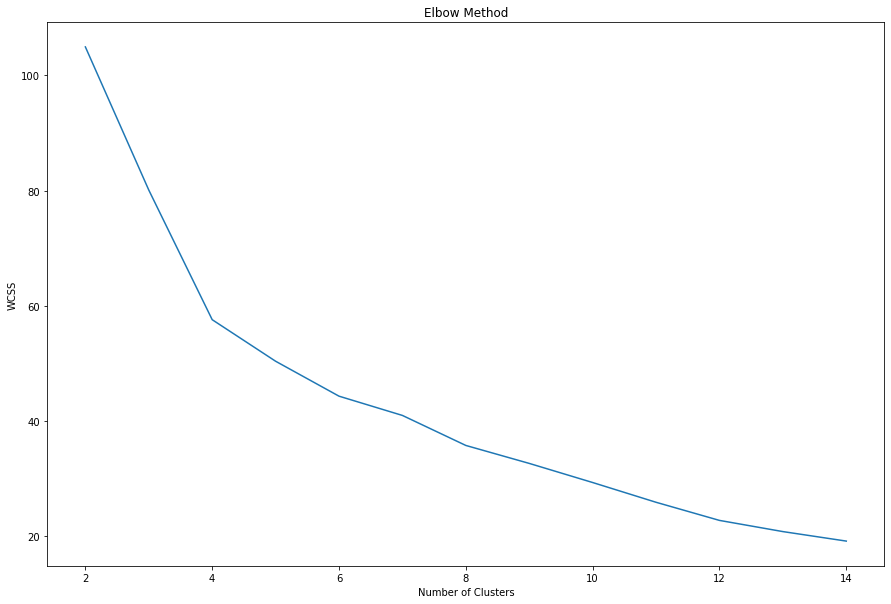

In [20]:
wcss = []
for i in range(2,15):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data_df)
    wcss.append(kmeans.inertia_)

fig_size = plt.figure(figsize = (15, 10))
plt.plot(range(2, 15), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [21]:
clusters_new = KMeans(4, random_state=10)
clusters_new.fit(scaled_data_df)

KMeans(n_clusters=4, random_state=10)

In [22]:
clusters_new.labels_

array([0, 1, 1, 0, 1, 1, 2, 2, 1, 0, 2, 3, 1, 2, 3, 2, 3, 0, 3, 1, 2, 1,
       3, 0, 1, 3, 3, 1, 3, 2, 1, 1, 0, 3, 2, 2, 2, 2, 2, 0, 3, 0, 1, 2,
       3, 2, 2, 3, 3, 2])

In [23]:
set(clusters_new.labels_)

{0, 1, 2, 3}

In [24]:
data3 = data['clusterid_new'] = clusters_new.labels_
data3

array([0, 1, 1, 0, 1, 1, 2, 2, 1, 0, 2, 3, 1, 2, 3, 2, 3, 0, 3, 1, 2, 1,
       3, 0, 1, 3, 3, 1, 3, 2, 1, 1, 0, 3, 2, 2, 2, 2, 2, 0, 3, 0, 1, 2,
       3, 2, 2, 3, 3, 2])

In [25]:
data3 = data.sort_values(by="clusterid_new")
data3

,States,Murder,Assault,UrbanPop,Rape,clusterid_new
0,Alabama,13.2,236,58,21.2,0
41,Tennessee,13.2,188,59,26.9,0
3,Arkansas,8.8,190,50,19.5,0
39,South Carolina,14.4,279,48,22.5,0
32,North Carolina,13.0,337,45,16.1,0
9,Georgia,17.4,211,60,25.8,0
23,Mississippi,16.1,259,44,17.1,0
17,Louisiana,15.4,249,66,22.2,0
42,Texas,12.7,201,80,25.5,1
31,New York,11.1,254,86,26.1,1


In [26]:
clusters_new.cluster_centers_

array([[ 1.42622412,  0.88321132, -0.82279055,  0.01946669],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842]])

In [27]:
data3 = data.groupby("clusterid_new").agg(['mean']).reset_index()
data3

,clusterid_new,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,13.937500,243.625000,53.750000,21.412500
1,1,10.815385,257.384615,76.000000,33.192308
2,2,5.656250,138.875000,73.875000,18.781250
3,3,3.600000,78.538462,52.076923,12.176923


In [28]:
#Silhouette score

from sklearn.metrics import silhouette_score
score = silhouette_score(scaled_data_df, kmeans.labels_, metric = 'euclidean')
score

0.2709166980832681

# DBSCAN

In [29]:
array = pd.DataFrame(scaler.fit_transform(data.iloc[:, 1:5]), columns = ['Murder', 'Assault', 'UrbanPop', 'Rape'])
array.head()

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


In [30]:
from sklearn.neighbors import NearestNeighbors

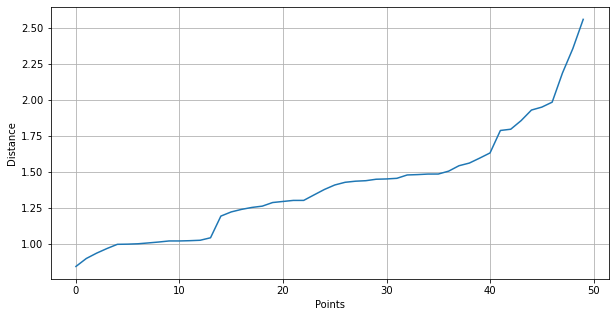

In [31]:
nearest_neighbors = NearestNeighbors(n_neighbors = 8)
neighbors = nearest_neighbors.fit(array)

distances, indices = neighbors.kneighbors(array)

distances = np.sort(distances[:,7], axis=0)

fig = plt.figure(figsize = (10, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")
plt.grid()

1.59692174455855


<Figure size 720x360 with 0 Axes>

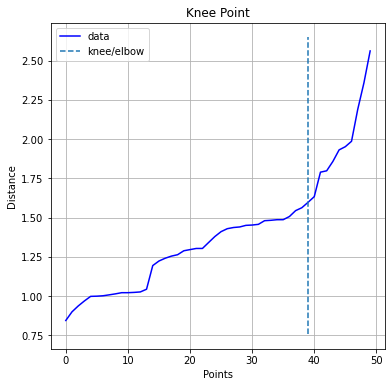

In [32]:
from kneed import KneeLocator

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize = (10,5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
plt.grid()  
print(distances[knee.knee])

In [33]:
dbscan = DBSCAN(eps=1, min_samples=3)
dbscan.fit(array)

DBSCAN(eps=1, min_samples=3)

In [34]:
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1,  0, -1,  1,  2,  1,  1,  1,  1,
        0,  1,  3,  1,  3,  1,  0,  1,  1,  1, -1,  1,  1,  3,  2, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  2,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [35]:
d = pd.DataFrame(dbscan.labels_, columns=['Clusters'])
d.value_counts()

Clusters
 1          28
-1          10
 0           6
 2           3
 3           3
dtype: int64

In [36]:
data4 = pd.concat([array, d], axis=1)
data4

,Murder,Assault,UrbanPop,Rape,Clusters
0,1.255179,0.790787,-0.526195,-0.003451,0
1,0.513019,1.118060,-1.224067,2.509424,-1
2,0.072361,1.493817,1.009122,1.053466,-1
3,0.234708,0.233212,-1.084492,-0.186794,-1
4,0.281093,1.275635,1.776781,2.088814,-1
5,0.025976,0.402909,0.869548,1.883901,-1
6,-1.040880,-0.736484,0.799761,-1.092723,1
7,-0.437875,0.815030,0.450825,-0.585834,-1
8,1.765415,1.990786,1.009122,1.150530,-1
9,2.229265,0.487757,-0.386621,0.492653,0


In [37]:
#filtering and get noisy datapoints -1
data4[data4['Clusters']==-1]

,Murder,Assault,UrbanPop,Rape,Clusters
1,0.513019,1.118060,-1.224067,2.509424,-1
2,0.072361,1.493817,1.009122,1.053466,-1
3,0.234708,0.233212,-1.084492,-0.186794,-1
4,0.281093,1.275635,1.776781,2.088814,-1
5,0.025976,0.402909,0.869548,1.883901,-1
7,-0.437875,0.815030,0.450825,-0.585834,-1
8,1.765415,1.990786,1.009122,1.150530,-1
10,-0.577030,-1.512241,1.218484,-0.111300,-1
27,1.023254,0.984726,1.078909,2.671197,-1
32,1.208794,2.015028,-1.433428,-0.553480,-1
